In [61]:
import pandas as pd
import numpy as np

In [62]:
true = pd.read_csv('True.csv')

In [63]:
fake = pd.read_csv('Fake.csv')

In [64]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [65]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [66]:
true['label'] = 1

In [67]:
fake['label'] = 0

In [68]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [69]:
news = pd.concat([fake, true], axis=0)

In [70]:
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [71]:
news.tail()


,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [72]:
news.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [73]:
news = news.drop(['title', 'subject', 'date'], axis =1 )

In [74]:
news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [75]:
news = news.sample(frac = 1)

In [76]:
news.head()

,text,label
23228,21st Century Wire says This is a bit of an odd...,0
2225,WASHINGTON (Reuters) - U.S. Navy Secretary Ric...,1
2660,Kellyanne Conway just got hammered with facts ...,0
1710,It s time for Sean Hannity to join Bill O Reil...,0
6242,(Reuters) - Former U.S. President George H.W. ...,1


In [77]:
news.reset_index(inplace=True)

In [78]:
news.head()

,index,text,label
0,23228,21st Century Wire says This is a bit of an odd...,0
1,2225,WASHINGTON (Reuters) - U.S. Navy Secretary Ric...,1
2,2660,Kellyanne Conway just got hammered with facts ...,0
3,1710,It s time for Sean Hannity to join Bill O Reil...,0
4,6242,(Reuters) - Former U.S. President George H.W. ...,1


In [79]:
news.drop(['index'], axis =1, inplace=True)

In [80]:
news.head()

,text,label
0,21st Century Wire says This is a bit of an odd...,0
1,WASHINGTON (Reuters) - U.S. Navy Secretary Ric...,1
2,Kellyanne Conway just got hammered with facts ...,0
3,It s time for Sean Hannity to join Bill O Reil...,0
4,(Reuters) - Former U.S. President George H.W. ...,1


In [81]:
import re

In [82]:
def wordopt(text):
  text = text.lower()
  text = re.sub(r'https?://\S+|www\.\S+','',text)
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'<.*?>', '',text)
  text = re.sub(r'\d\n', ' ',text)
  return text


In [83]:
news['text']=news['text'].apply(wordopt)

In [84]:
news['text']

,text
0,21st century wire says this is a bit of an odd...
1,washington reuters us navy secretary richard ...
2,kellyanne conway just got hammered with facts ...
3,it s time for sean hannity to join bill o reil...
4,reuters former us president george hw bush ha...
...,...
44893,a group of thugs marched through the main trai...
44894,donald trump may be realizing that there s som...
44895,the information below is disturbing and should...
44896,michelle obama showed off her amazing singing ...


In [85]:
x = news['text']
y = news['label']

In [86]:
x

,text
0,21st century wire says this is a bit of an odd...
1,washington reuters us navy secretary richard ...
2,kellyanne conway just got hammered with facts ...
3,it s time for sean hannity to join bill o reil...
4,reuters former us president george hw bush ha...
...,...
44893,a group of thugs marched through the main trai...
44894,donald trump may be realizing that there s som...
44895,the information below is disturbing and should...
44896,michelle obama showed off her amazing singing ...


In [87]:
y

,label
0,0
1,1
2,0
3,0
4,1
...,...
44893,0
44894,0
44895,0
44896,0


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3 )

In [90]:
x_train.shape

(31428,)

In [91]:
x_test.shape

(13470,)

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
vectorization = TfidfVectorizer()

In [94]:
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [95]:
xv_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6550506 stored elements and shape (31428, 181163)>

In [96]:
xv_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2770953 stored elements and shape (13470, 181163)>

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
LR = LogisticRegression()

In [99]:
LR.fit(xv_train, y_train)

LogisticRegression()

In [100]:
pred_lr = LR.predict(xv_test)

In [101]:
LR.score(xv_test, y_test)

0.9891610987379361

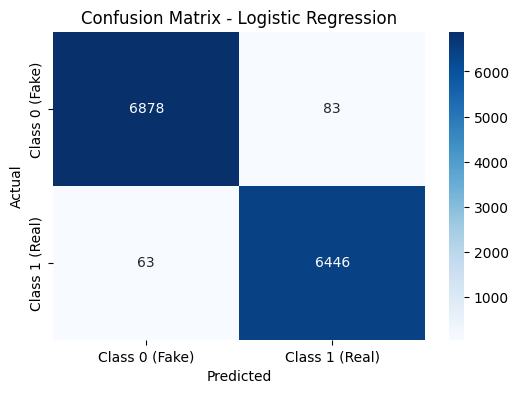

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred_lr = LR.predict(xv_test)
cm = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Class 0 (Fake)", "Class 1 (Real)"],
            yticklabels=["Class 0 (Fake)", "Class 1 (Real)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6961
           1       0.99      0.99      0.99      6509

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
DTC = DecisionTreeClassifier()

In [108]:
DTC.fit(xv_train, y_train)

DecisionTreeClassifier()

In [109]:
pred_dtc = DTC.predict(xv_test)

In [110]:
DTC.score(xv_test, y_test)

0.995025983667409

In [111]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6961
           1       0.99      1.00      0.99      6509

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



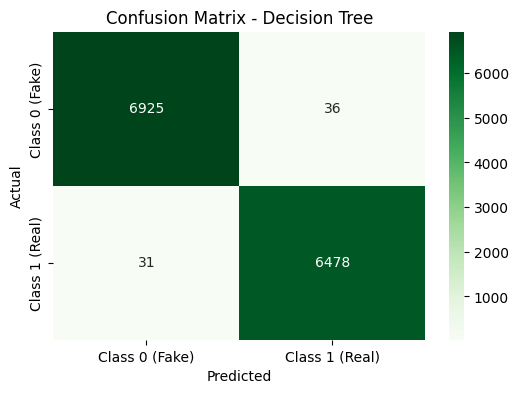

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

pred_dt = DTC.predict(xv_test)
cm = confusion_matrix(y_test, pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Class 0 (Fake)", "Class 1 (Real)"],
            yticklabels=["Class 0 (Fake)", "Class 1 (Real)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rfc = RandomForestClassifier()

In [114]:
rfc.fit(xv_train, y_train)

RandomForestClassifier()

In [115]:
pred_rfc = rfc.predict(xv_test)

In [116]:
rfc.score(xv_test, y_test)

0.9879732739420936

In [117]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6961
           1       0.99      0.99      0.99      6509

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



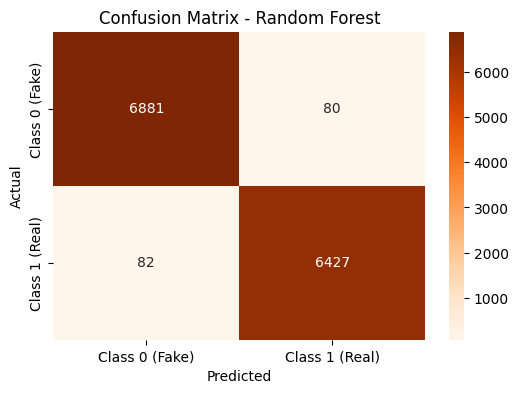

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

pred_rf = rfc.predict(xv_test)
cm = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["Class 0 (Fake)", "Class 1 (Real)"],
            yticklabels=["Class 0 (Fake)", "Class 1 (Real)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
gbc = GradientBoostingClassifier()

In [120]:
gbc.fit(xv_train, y_train)

GradientBoostingClassifier()

In [121]:
pred_gbc = gbc.predict(xv_test)

In [122]:
gbc.score(xv_test, y_test)

0.9948775055679288

In [123]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6961
           1       0.99      1.00      0.99      6509

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



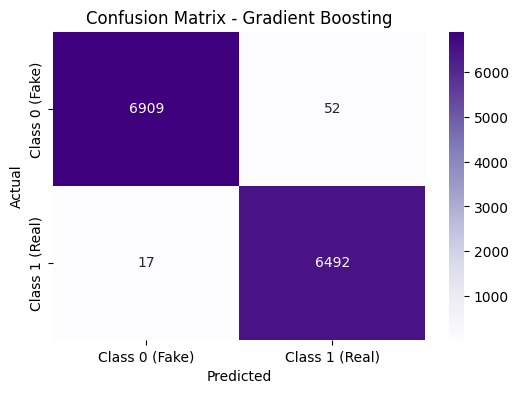

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred_gbc = gbc.predict(xv_test)
cm = confusion_matrix(y_test, pred_gbc)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Class 0 (Fake)", "Class 1 (Real)"],
            yticklabels=["Class 0 (Fake)", "Class 1 (Real)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


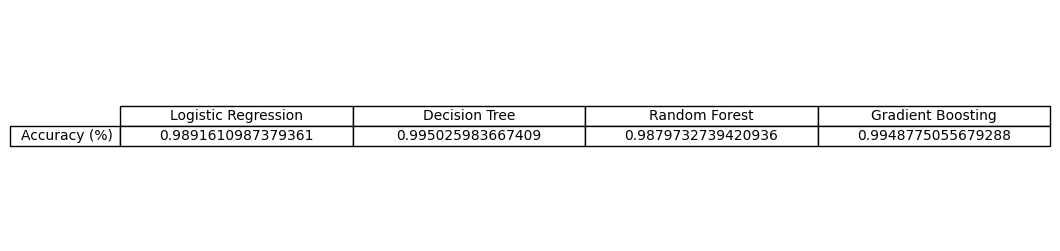

In [150]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pred_lr = LR.predict(xv_test)
pred_dtc = DTC.predict(xv_test)
pred_rfc = rfc.predict(xv_test)
pred_gbc = gbc.predict(xv_test)

# Calculate metrics (in percentage)
results = {
    "Logistic Regression": [
        accuracy_score(y_test, pred_lr) ,

    ],
    "Decision Tree": [
        accuracy_score(y_test, pred_dtc) ,

    ],
    "Random Forest": [
        accuracy_score(y_test, pred_rfc) ,

    ],
    "Gradient Boosting": [
        accuracy_score(y_test, pred_gbc) ,

    ]
}
df_results = pd.DataFrame(results, index=["Accuracy (%)"])
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_results.values,
                 rowLabels=df_results.index,
                 colLabels=df_results.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.show()


In [124]:
def output_label(n):
  if n==0:
    return "It is Fake News"
  elif n == 1:
    return "It is Genuine News"

In [125]:
def manual_testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(wordopt)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_LR = LR.predict(new_xv_test)
  pred_dtc = DTC.predict(new_xv_test)
  pred_rfc = rfc.predict(new_xv_test)
  pred_gbc = gbc.predict(new_xv_test)
  return print("\n\nLR Prediction: {} \n\nDTC Prediction: {}\n\nRFC Prediction: {} \n\nGBC Prediction: {} ".format(output_label(pred_LR[0]),output_label(pred_dtc[0]), output_label(pred_rfc[0]), output_label(pred_gbc[0])))

In [151]:
news_article = str(input())

COVID-19 as a bio-weapon created by the US in 2003 https://www.vipnoviny.cz/kdo-stoji-za-vznikem-koronaviru-2019-ncov/


In [128]:
manual_testing(news_article)



LR Prediction: It is Fake News 

DTC Prediction: It is Fake News

RFC Prediction: It is Fake News 

GBC Prediction: It is Fake News 
